In [1]:
import matplotlib.cm as cm
import networkx as nx
import numpy as np
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.10'

In [2]:
# get the network for Piedmont, calculate its basic stats, then show the average circuity
stats = ox.basic_stats(ox.graph_from_place('Piedmont, California, USA'))
stats['circuity_avg']

1.0877243275299155

In [3]:

# get the street network for a place, and its area in square meters
place = 'Piedmont, California, USA'
gdf = ox.gdf_from_place(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type='drive_service')

In [4]:
# calculate basic and extended network stats, merge them together, and display
stats = ox.basic_stats(G, area=area)
extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

NetworkXNotImplemented: not implemented for multigraph type

In [5]:
import osmnx as ox

In [6]:
import networkx as nx

In [7]:
import geopandas as gpd

In [8]:
 import matplotlib.pyplot as plt


In [9]:
import pandas as pd

In [10]:
 place_name = "Kamppi, Helsinki, Finland"

In [11]:
graph = ox.graph_from_place(place_name, network_type='drive')


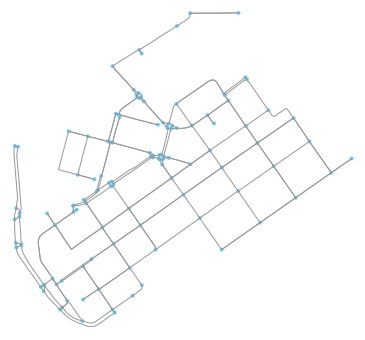

In [12]:
fig, ax = ox.plot_graph(graph)

In [13]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [14]:
 edges.columns

Index(['u', 'v', 'key', 'osmid', 'lanes', 'name', 'maxspeed', 'oneway',
       'highway', 'length', 'geometry', 'junction', 'bridge', 'access'],
      dtype='object')

In [15]:
 edges['highway'].value_counts()

residential      112
tertiary          78
primary           26
secondary         17
unclassified      11
living_street      4
primary_link       1
Name: highway, dtype: int64

In [16]:
 graph_proj = ox.project_graph(graph)


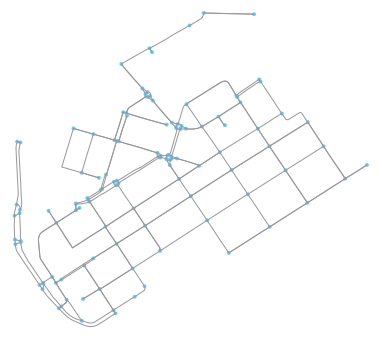

In [17]:
 fig, ax = ox.plot_graph(graph_proj)


In [18]:
 plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [19]:
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [20]:
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +units=m +no_defs


In [21]:
 edges_proj.head()

,u,v,key,osmid,lanes,name,maxspeed,oneway,highway,length,geometry,junction,bridge,access
0,25216594,1372425714,0,23856784,2,Mechelininkatu,40,True,primary,40.885,"LINESTRING (384631.322 6671580.071, 384624.750...",NaN,NaN,NaN
1,25238874,1372425713,0,"[29977177, 30470347]",3,Mechelininkatu,40,True,primary,16.601,"LINESTRING (384625.787 6671454.380, 384626.281...",NaN,NaN,NaN
2,25238944,25216594,0,"[372440330, 8135861]",2,NaN,40,True,primary,25.190,"LINESTRING (384643.473 6671561.534, 384643.045...",NaN,NaN,NaN
3,25238944,319896278,0,"[25514547, 677423564, 30288797, 30288799]","[3, 2]",Mechelininkatu,40,True,primary,242.476,"LINESTRING (384643.473 6671561.534, 384648.006...",NaN,NaN,NaN
4,25291537,25291591,0,"[30568275, 36729015, 316590744, 316590745, 316...",NaN,Fredrikinkatu,30,True,tertiary,139.090,"LINESTRING (385515.553 6671500.134, 385514.557...",NaN,NaN,NaN


In [22]:
stats = ox.basic_stats(graph_proj)

In [23]:
stats

{'n': 124,
 'm': 249,
 'k_avg': 4.016129032258065,
 'intersection_count': 116,
 'streets_per_node_avg': 3.217741935483871,
 'streets_per_node_counts': {0: 0, 1: 8, 2: 1, 3: 71, 4: 44},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.06451612903225806,
  2: 0.008064516129032258,
  3: 0.5725806451612904,
  4: 0.3548387096774194},
 'edge_length_total': 19967.856000000003,
 'edge_length_avg': 80.19219277108435,
 'street_length_total': 13659.232000000002,
 'street_length_avg': 74.64061202185793,
 'street_segments_count': 183,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.270822205422653e-05,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [24]:
area = edges_proj.unary_union.convex_hull.area

In [25]:
stats = ox.basic_stats(graph_proj, area=area)

In [26]:
 extended_stats = ox.extended_stats(graph_proj, ecc=True, bc=True, cc=True)


NetworkXNotImplemented: not implemented for multigraph type

In [27]:
for key, value in extended_stats.items():
   ....:     stats[key] = value
   ....: 


NameError: name 'extended_stats' is not defined

In [28]:
 edges_proj.bounds.head()

,minx,miny,maxx,maxy
0,384624.169953,6.671540e+06,384631.322372,6.671580e+06
1,384625.787221,6.671438e+06,384627.187049,6.671454e+06
2,384631.322372,6.671562e+06,384643.473274,6.671580e+06
3,384639.758183,6.671562e+06,384649.706785,6.671803e+06
4,385439.278556,6.671500e+06,385515.553244,6.671617e+06


In [29]:
from shapely.geometry import box

In [30]:
bbox = box(*edges_proj.unary_union.bounds)


In [31]:
print(bbox)

POLYGON ((385855.0300992895 6671142.734328128, 385855.0300992895 6672267.057001855, 384623.3898322977 6672267.057001855, 384623.3898322977 6671142.734328128, 385855.0300992895 6671142.734328128))


In [32]:
 orig_point = bbox.centroid

In [33]:
 print(orig_point)

POINT (385239.2099657936 6671704.895664992)


In [34]:
nodes_proj['x'] = nodes_proj.x.astype(float)

In [35]:
maxx = nodes_proj['x'].max()

In [36]:
target_loc = nodes_proj.loc[nodes_proj['x']==maxx, :]

In [37]:
print(target_loc)

                      y              x      osmid          highway        lon  \
317703609  6.671722e+06  385855.030099  317703609  traffic_signals  24.943012   

                lat                        geometry  
317703609  60.16641  POINT (385855.030 6671721.810)  


In [38]:
 target_point = target_loc.geometry.values[0]


In [39]:
print(target_point)

POINT (385855.0300992895 6671721.810323974)


In [40]:
orig_xy = (orig_point.y, orig_point.x)

In [41]:
target_xy = (target_point.y, target_point.x)

In [42]:
orig_node = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')

In [43]:
target_node = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')


In [44]:
o_closest = nodes_proj.loc[orig_node]


In [45]:
t_closest = nodes_proj.loc[target_node]

In [46]:
print(orig_node)
1372441183

1372441189


1372441183

In [47]:
print(target_node)

317703609


In [48]:
od_nodes = gpd.GeoDataFrame([o_closest, t_closest], geometry='geometry', crs=nodes_proj.crs)

In [49]:
route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')


In [50]:
print(route)

[1372441189, 1372441183, 1372441170, 60170471, 1377211668, 1377211666, 25291565, 25291564, 317703609]


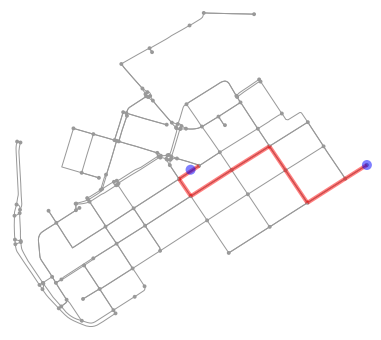

In [51]:
fig, ax = ox.plot_graph_route(graph_proj, route, origin_point=orig_xy, destination_point=target_xy)

In [52]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>